# Grid world path optimization using genetic algorithms

## Importing modules

In [1]:
import os
from typing import List, Tuple

import matplotlib.pyplot as plt

from IPython.display import Video

import functions as fn
import simulations as sm

## Parameters

In [2]:
# Grid parameters
GRID_SIZE: Tuple[int, int] = (10, 15)
START_POSITION: Tuple[int, int] = (6, 1)
END_POSITION: Tuple[int, int] = (4, 13)
OBSTACLES: List[Tuple[int, int]] = [
    (0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14),
    (1, 0), (1, 3), (1, 14), (2, 0), (2, 3), (2, 5), (2, 6), (2, 7), (2, 11), (2, 14), (3, 0), (3, 3), (3, 10), (3, 11), (3, 13), 
    (3, 14), (4, 0), (4, 3), (4, 9), (4, 10), (4, 11), (4, 14), (5, 0), (5, 3), (5, 6), (5, 11), (5, 13), (5, 14), (6, 0), (6, 6), 
    (6, 9), (6, 11), (6, 14), (7, 0), (7, 6), (7, 9), (7, 14), (8, 0), (8, 3), (8, 6), (8, 14), (9, 0), (9, 1), (9, 2), (9, 3), 
    (9, 4), (9, 5), (9, 6), (9, 7), (9, 8), (9, 9), (9, 10), (9, 11), (9, 12), (9, 13), (9, 14)
]
NUM_OPTIMAL_STEPS: int = 20

# Simulation parameters
CHROMOSOME_LENGTH: int = 64
POPULATION_SIZE: int = 100
NUM_GENERATIONS: int = 1000
BIAS: int = 3
PROGRESSIVE_MUTATION: bool = True
MUTATION_RATE: float = 0.01
EARLY_STOP: bool = False
BEST_ONES_PERCENTAGE: float = 0.1
WORST_ONES_PERCENTAGE: float = 0.2
REVISIT_POSSIBLE: bool = False

# Visualization
WINDOW_SIZE: int = 10

# Paths
RESULTS_PATH: str = "./results"
GA_RESULTS_PATH: str = f"{RESULTS_PATH}/GA results"
GA_VERSION_PATH: str = f"{GA_RESULTS_PATH}/reentrant fields" if not PROGRESSIVE_MUTATION else f"{GA_RESULTS_PATH}/non-reentrant fields"
ALL_TO_ALL_RESULTS_PATH: str = f"{GA_VERSION_PATH}/all to all results"
ALL_TO_ALL_VIDEO_PATH: str = f"{GA_VERSION_PATH}/all_to_all_results.mp4"
BEST_TO_REST_RESULTS_PATH: str = f"{GA_VERSION_PATH}/best to rest results"
BEST_TO_REST_VIDEO_PATH: str = f"{GA_VERSION_PATH}/best_to_rest_results.mp4"
HYBRID_RESULTS_PATH: str = f"{GA_VERSION_PATH}/hybrid results"
HYBRID_VIDEO_PATH: str = f"{GA_VERSION_PATH}/hybrid_results.mp4"

# Other
RANDOM_STATE: int = 42
LINE: str = 100*'-'
DOUBLE_LINE: str = 100*'='
SIMULATION_STARTED: str = 36*'-' + " !!! SIMULATION STARTED !!! " + 36*'-'
SIMULATION_FINISHED: str = 36*'-' + " !!! SIMULATION FINISHED !!! " + 35*'-'

## Results directories creation

In [3]:
os.makedirs(RESULTS_PATH, exist_ok=True)
os.makedirs(GA_RESULTS_PATH, exist_ok=True)
for directory in [GA_VERSION_PATH, ALL_TO_ALL_RESULTS_PATH, BEST_TO_REST_RESULTS_PATH, HYBRID_RESULTS_PATH]:
    fn.create_or_empty_directory(directory)

## Grid world initialization

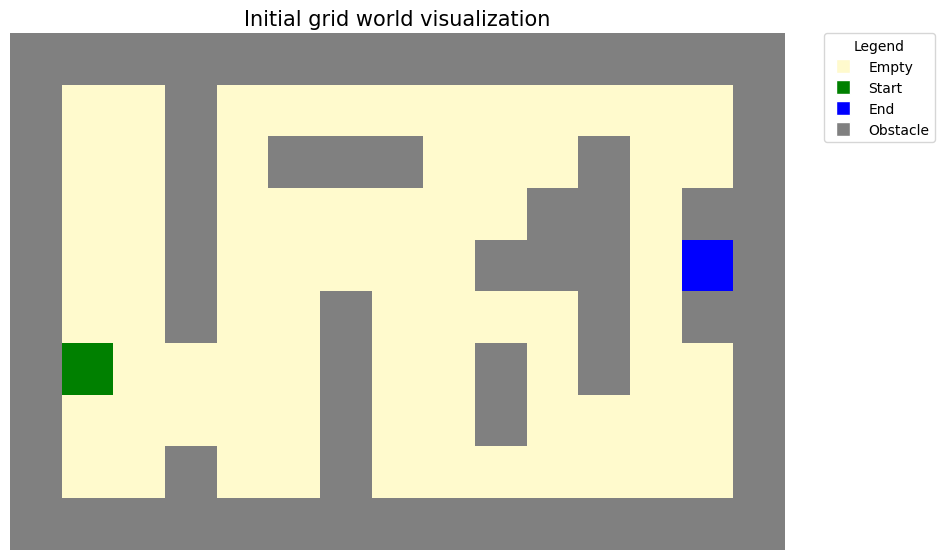

In [4]:
initial_grid_world = fn.grid_world_creation(GRID_SIZE, START_POSITION, END_POSITION, OBSTACLES)
fn.grid_world_visualization(initial_grid_world,title="Initial grid world visualization", agent_flag=0)

## All to all crossover case

### Simulation

In [5]:
results = sm.ga_simulation(
    num_generations=NUM_GENERATIONS,
    population_size=POPULATION_SIZE,
    chromosome_length=CHROMOSOME_LENGTH,
    initial_mutation_rate=MUTATION_RATE,
    selection_type="all to all",
    progressive_mutation=PROGRESSIVE_MUTATION,
    bias=BIAS,
    early_stop=EARLY_STOP,
    best_ones_percentage=BEST_ONES_PERCENTAGE,
    worst_ones_percentage=WORST_ONES_PERCENTAGE,
    num_optimal_steps=NUM_OPTIMAL_STEPS,
    start_position=START_POSITION,
    end_position=END_POSITION,
    grid_size=GRID_SIZE,
    initial_grid_world=initial_grid_world,
    random_seed=RANDOM_STATE,
    simulation_started_message=SIMULATION_STARTED,
    simulation_finished_message=SIMULATION_FINISHED,
    revisit_possible = REVISIT_POSSIBLE,
    verbose="Full",
    line = LINE,
    double_line = DOUBLE_LINE  
)

best_generation = results[1]
best_scores = results[7]
median_scores = results[9]
mean_scores = results[10]
best_grid_worlds = results[11]
best_population_paths = results[12]
generation = results[13]

------------------------------------ !!! SIMULATION STARTED !!! ------------------------------------
 1. generation finished - best score: 4.9286 - median score: 7.6205 - mean score: 7.6211 - steps: 25
----------------------------------------------------------------------------------------------------
 10. generation finished - best score: 1.0 - median score: 5.6081 - mean score: 5.4206 - steps: 24
----------------------------------------------------------------------------------------------------
 20. generation finished - best score: 1.0 - median score: 3.2901 - mean score: 3.7846 - steps: 24
----------------------------------------------------------------------------------------------------
 30. generation finished - best score: 0.7071 - median score: 4.2976 - mean score: 5.0625 - steps: 22
----------------------------------------------------------------------------------------------------
 40. generation finished - best score: 0.7071 - median score: 4.9114 - mean score: 5.1965 - st

### Result scores visualization

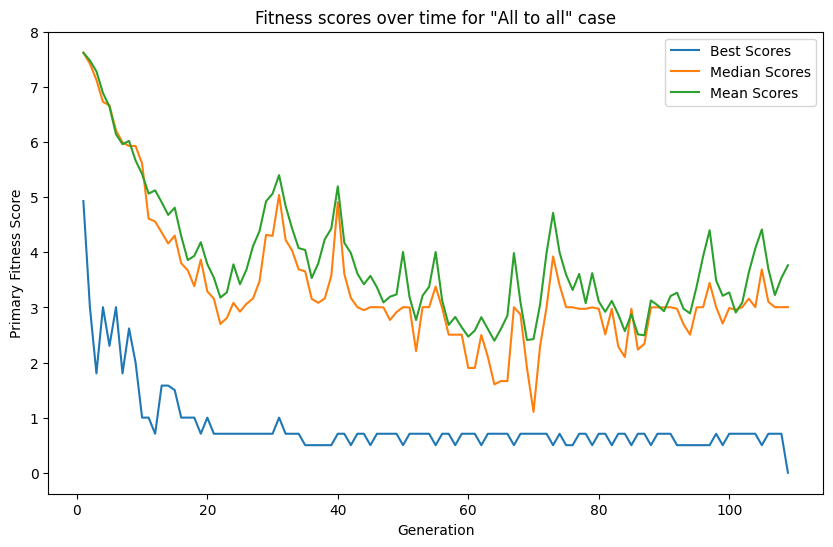

In [6]:
x_values = range(1, len(best_scores)+1)

plt.figure(figsize=(10, 6))

plt.plot(x_values, best_scores, label="Best Scores")
plt.plot(x_values, median_scores, label="Median Scores")
plt.plot(x_values, mean_scores, label="Mean Scores")

plt.title("Fitness scores over time for \"All to all\" case")
plt.xlabel("Generation")
plt.ylabel("Primary Fitness Score")
plt.legend()

plt.show()

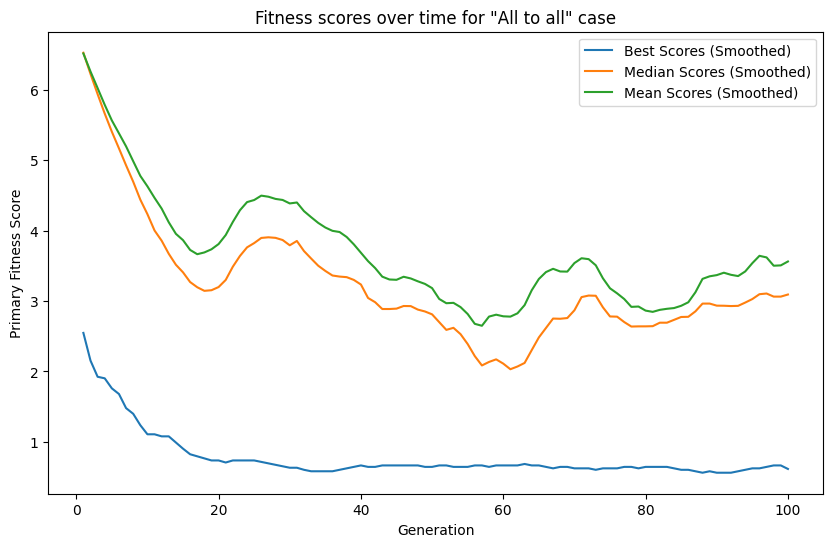

In [7]:
best_scores_smooth = fn.moving_average(best_scores, WINDOW_SIZE)
median_scores_smooth = fn.moving_average(median_scores, WINDOW_SIZE)
mean_scores_smooth = fn.moving_average(mean_scores, WINDOW_SIZE)

x_values_smooth = range(1, len(best_scores_smooth) + 1)

plt.figure(figsize=(10, 6))

plt.plot(x_values_smooth, best_scores_smooth, label="Best Scores (Smoothed)")
plt.plot(x_values_smooth, median_scores_smooth, label="Median Scores (Smoothed)")
plt.plot(x_values_smooth, mean_scores_smooth, label="Mean Scores (Smoothed)")

plt.title("Fitness scores over time for \"All to all\" case")
plt.xlabel("Generation")
plt.ylabel("Primary Fitness Score")
plt.legend()

plt.show()

### Grid world path optimization evolution

1. generation 1 grid world


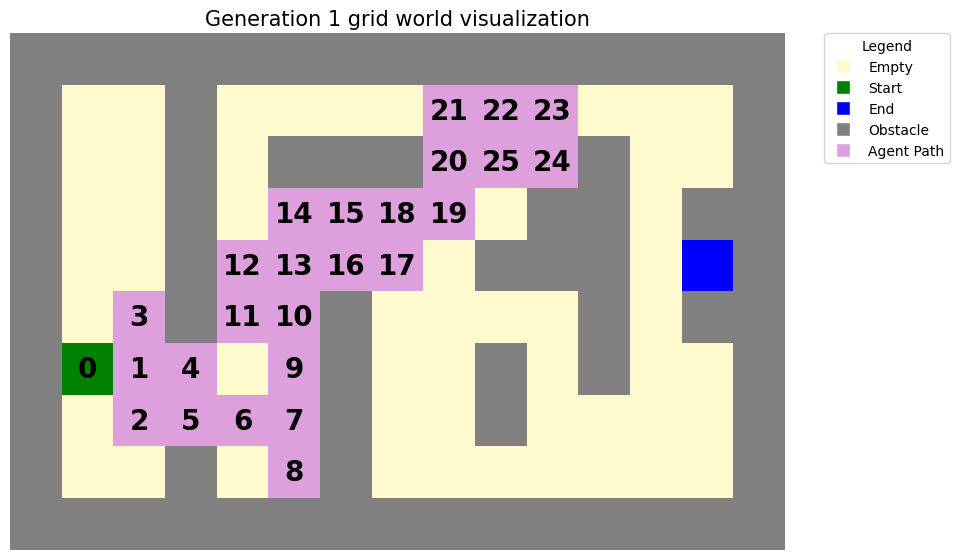

----------------------------------------------------------------------------------------------------

2. generation 10 grid world


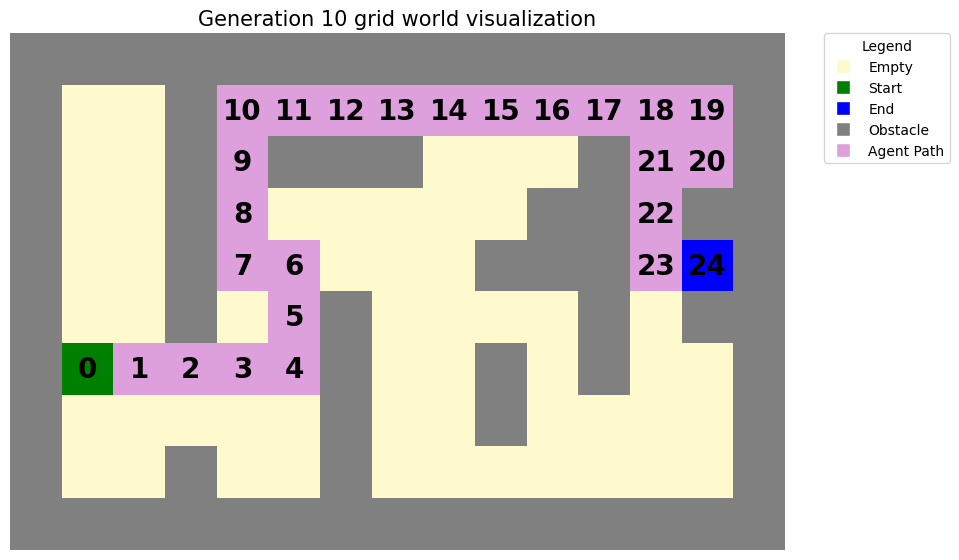

----------------------------------------------------------------------------------------------------

3. generation 20 grid world


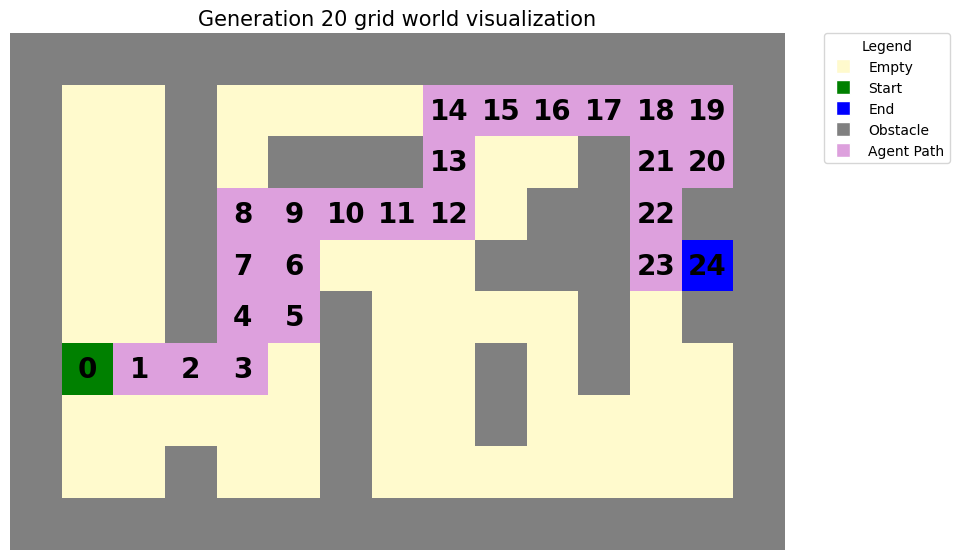

----------------------------------------------------------------------------------------------------

4. generation 30 grid world


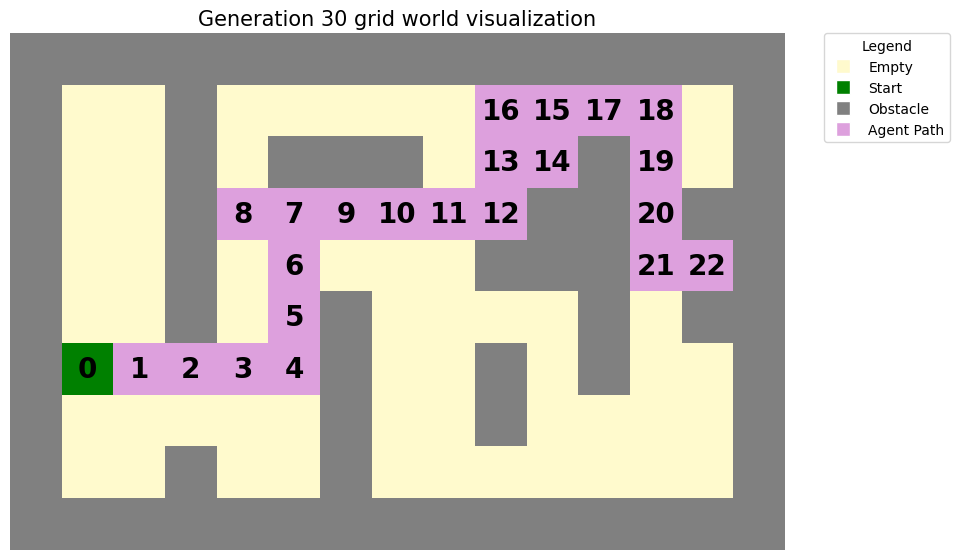

----------------------------------------------------------------------------------------------------

5. generation 40 grid world


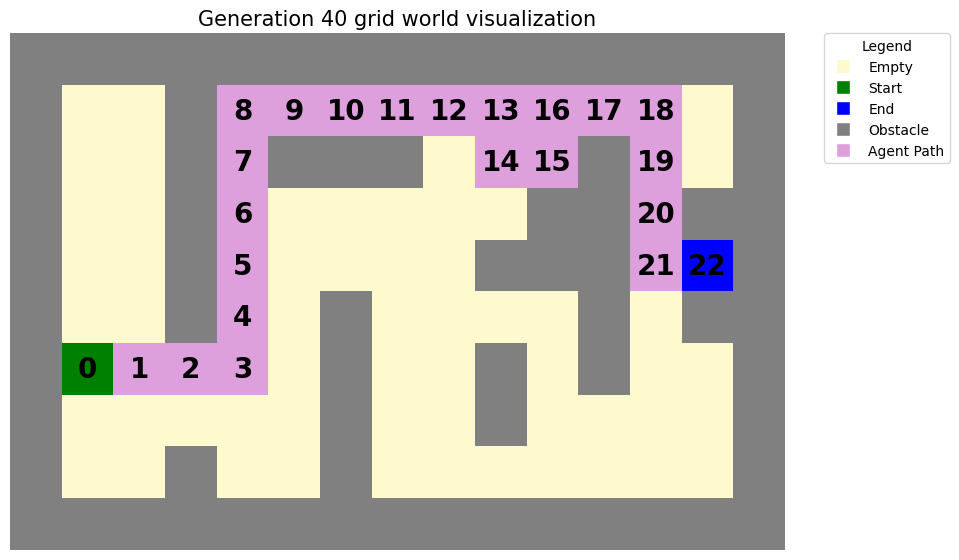

----------------------------------------------------------------------------------------------------

6. generation 50 grid world


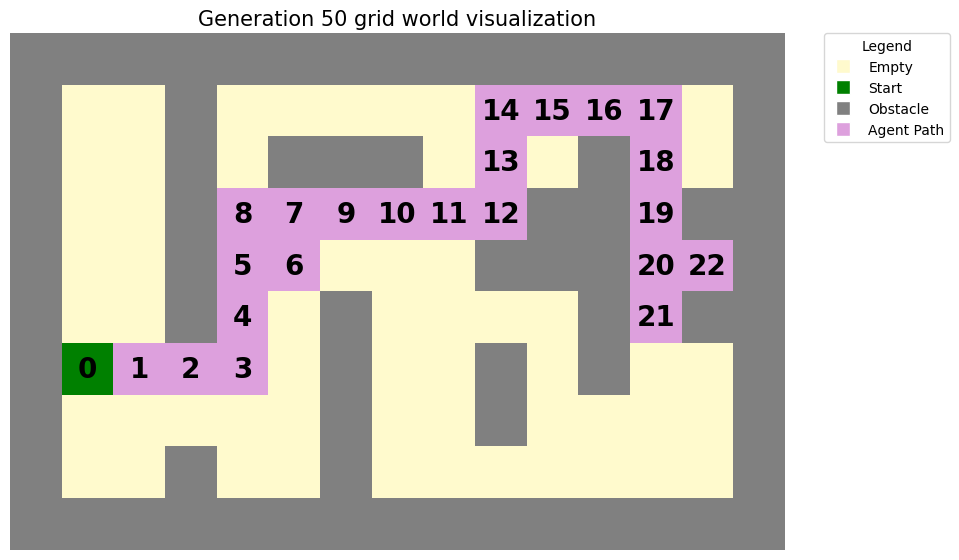

----------------------------------------------------------------------------------------------------

7. generation 60 grid world


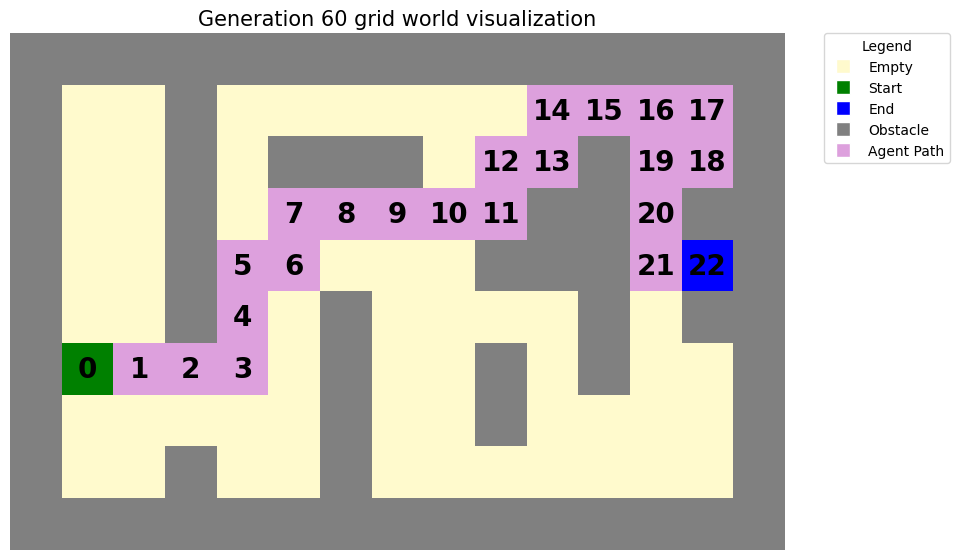

----------------------------------------------------------------------------------------------------

8. generation 70 grid world


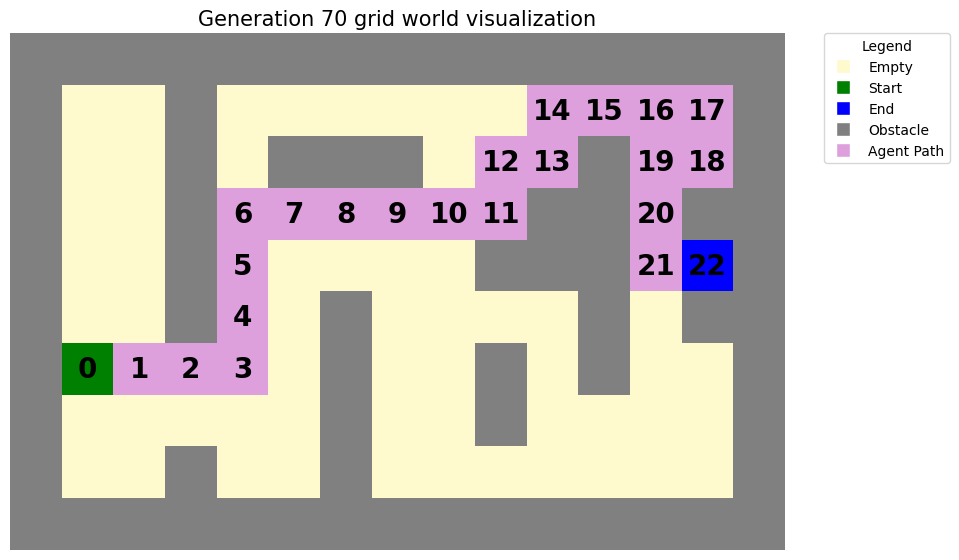

----------------------------------------------------------------------------------------------------

9. generation 80 grid world


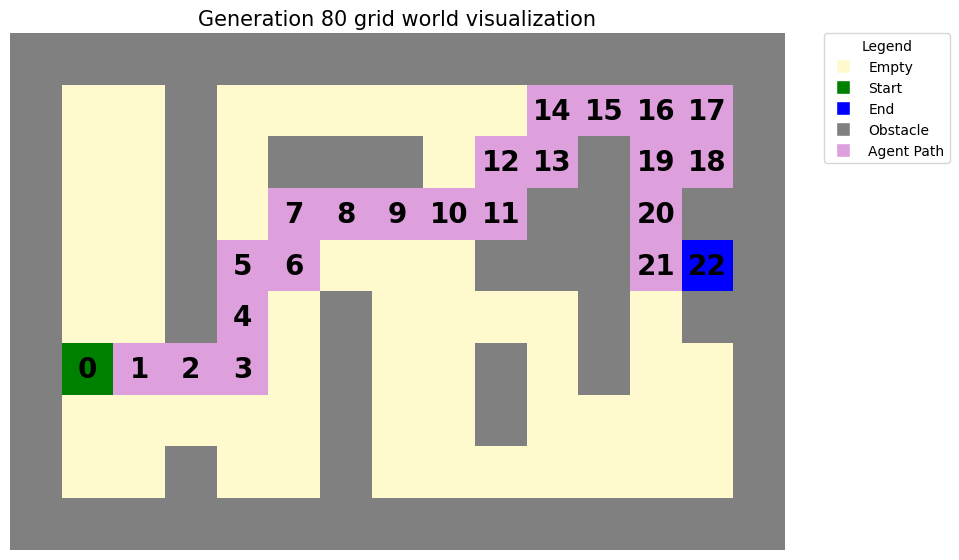

----------------------------------------------------------------------------------------------------

10. generation 90 grid world


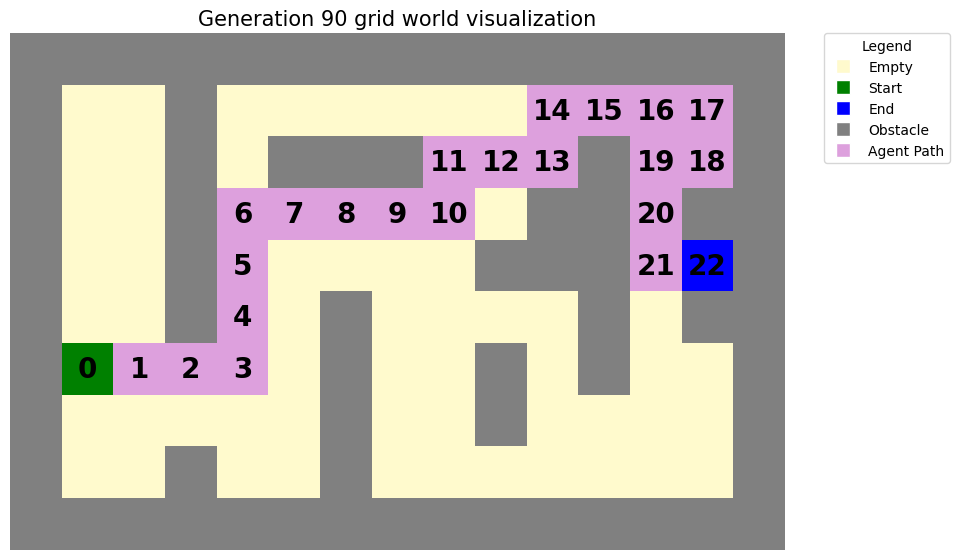

----------------------------------------------------------------------------------------------------

11. generation 100 grid world


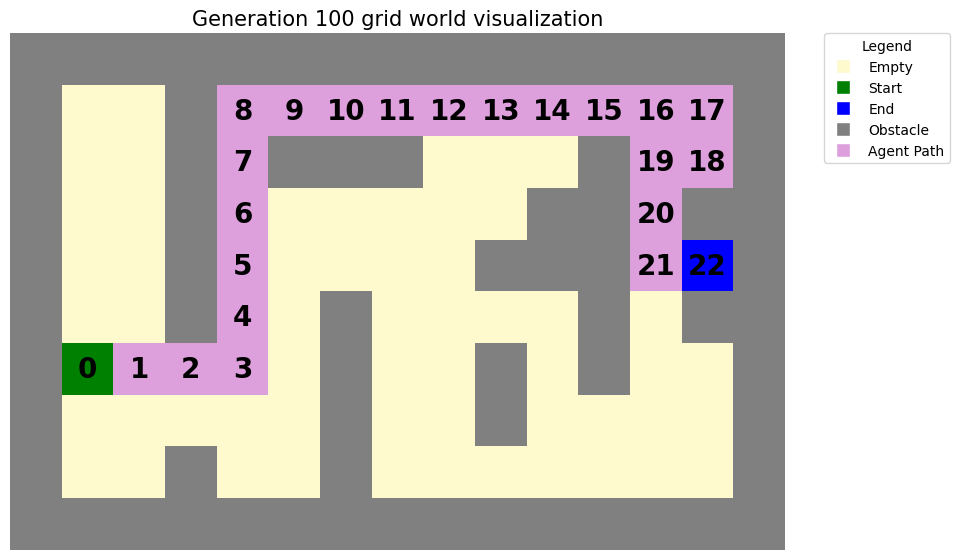

----------------------------------------------------------------------------------------------------

12. generation 109 grid world


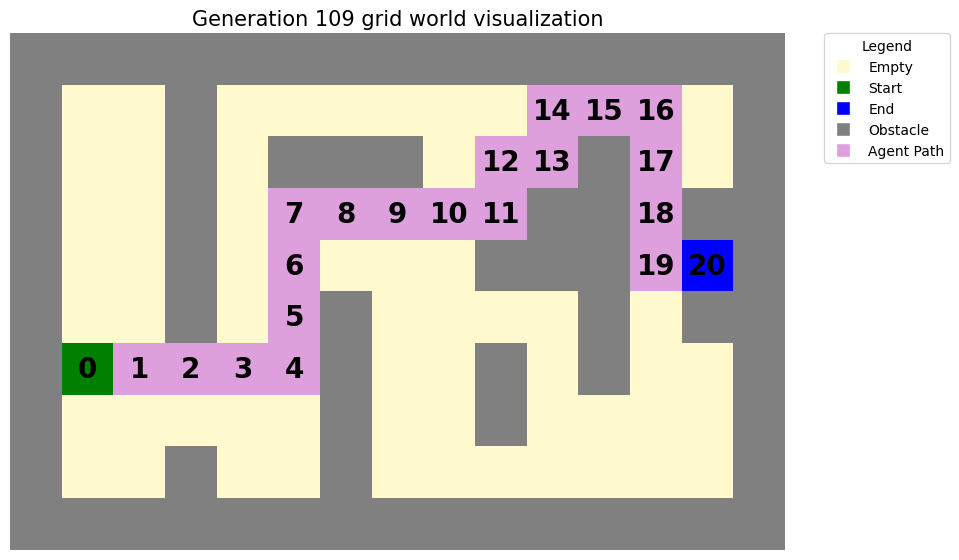

----------------------------------------------------------------------------------------------------



In [8]:
generation_step = generation // 10

counter = 1
for generation, grid_world in enumerate(best_grid_worlds, 1):
    if generation == 1 or generation == best_generation or generation%generation_step == 0:
        print(f"{counter}. generation {generation} grid world")
        title = f"Generation {generation} grid world visualization"
        fn.grid_world_visualization(grid_world, agent_path=best_population_paths[generation-1], title=title, agent_flag=1)
        print(LINE)
        print()
        counter += 1

In [9]:
print(DOUBLE_LINE)
print("PATHS RECONSTRUCTION AND VIDEO CREATION")
print(DOUBLE_LINE)

print("Path reconstruction:")
fn.path_reconstruction(
    best_population_paths=best_population_paths, 
    initial_grid_world=initial_grid_world, 
    results_path=ALL_TO_ALL_RESULTS_PATH, 
    start_position=START_POSITION, 
    end_position=END_POSITION, 
    step=generation_step, 
    title_type="generation", 
    path_flag=1
)

print(LINE)

print("Video creation...")
fn.video_creation(ALL_TO_ALL_RESULTS_PATH, ALL_TO_ALL_VIDEO_PATH)
print("Video creation finished!")

print(DOUBLE_LINE)

PATHS RECONSTRUCTION AND VIDEO CREATION
Path reconstruction:


Processing generations/iterations: 100%|██████████| 12/12 [02:14<00:00, 11.25s/it]


----------------------------------------------------------------------------------------------------
Video creation...


ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7.3.0 (crosstool-NG 1.23.0.449-a04d0)
  configuration: --prefix=/tmp/build/80754af9/ffmpeg_1587154242452/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placeho --cc=/tmp/build/80754af9/ffmpeg_1587154242452/_build_env/bin/x86_64-conda_cos6-linux-gnu-cc --disable-doc --enable-avresample --enable-gmp --enable-hardcoded-tables --enable-libfreetype --enable-libvpx --enable-pthreads --enable-libopus --enable-postproc --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --disable-nonfree --enable-gpl --enable-gnutls --disable-openssl --enable-libopenh264 --enable-libx264
  libavutil      56. 31.100 / 56. 31.100
  libavcodec     58. 54.100 / 58. 54.100
  libavformat    58. 29.100 / 58. 29.100


Video saved to ./results/GA results/non-reentrant fields/all_to_all_results.mp4
Video creation finished!


frame=  282 fps=132 q=-1.0 Lsize=     408kB time=00:00:55.80 bitrate=  59.9kbits/s speed=26.1x    
video:405kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.853394%
[libx264 @ 0x563f7f5ef180] frame I:2     Avg QP: 7.97  size: 23580
[libx264 @ 0x563f7f5ef180] frame P:182   Avg QP:16.63  size:  1771
[libx264 @ 0x563f7f5ef180] frame B:98    Avg QP:15.61  size:   454
[libx264 @ 0x563f7f5ef180] consecutive B-frames: 40.1% 31.2% 28.7%  0.0%
[libx264 @ 0x563f7f5ef180] mb I  I16..4: 82.1%  4.6% 13.4%
[libx264 @ 0x563f7f5ef180] mb P  I16..4:  1.4%  0.4%  0.8%  P16..4:  1.5%  0.2%  0.1%  0.0%  0.0%    skip:95.5%
[libx264 @ 0x563f7f5ef180] mb B  I16..4:  0.6%  0.2%  0.2%  B16..8:  2.1%  0.1%  0.0%  direct: 0.1%  skip:96.6%  L0:57.7% L1:41.4% BI: 0.9%
[libx264 @ 0x563f7f5ef180] 8x8 transform intra:13.7% inter:53.3%
[libx264 @ 0x563f7f5ef180] coded y,uvDC,uvAC intra: 13.8% 35.4% 29.2% inter: 0.4% 0.7% 0.5%
[libx264 @ 0x563f7f5ef180] i16 v,h,dc,p: 68% 31%  1%  0%
[li

In [10]:
Video(ALL_TO_ALL_VIDEO_PATH, embed=True)

## The best ones to rest crossover case

### Simulation

In [11]:
results = sm.ga_simulation(
    num_generations=NUM_GENERATIONS,
    population_size=POPULATION_SIZE,
    chromosome_length=CHROMOSOME_LENGTH,
    initial_mutation_rate=MUTATION_RATE,
    selection_type="best to rest",
    progressive_mutation=PROGRESSIVE_MUTATION,
    bias=BIAS,
    early_stop=EARLY_STOP,
    best_ones_percentage=BEST_ONES_PERCENTAGE,
    worst_ones_percentage=WORST_ONES_PERCENTAGE,
    num_optimal_steps=NUM_OPTIMAL_STEPS,
    start_position=START_POSITION,
    end_position=END_POSITION,
    grid_size=GRID_SIZE,
    initial_grid_world=initial_grid_world,
    random_seed=RANDOM_STATE,
    simulation_started_message=SIMULATION_STARTED,
    simulation_finished_message=SIMULATION_FINISHED,
    revisit_possible = REVISIT_POSSIBLE,
    verbose="Full",
    line = LINE,
    double_line = DOUBLE_LINE    
)

best_generation = results[1]
best_scores = results[7]
median_scores = results[9]
mean_scores = results[10]
best_grid_worlds = results[11]
best_population_paths = results[12]
generation = results[13]

------------------------------------ !!! SIMULATION STARTED !!! ------------------------------------
 1. generation finished - best score: 4.9286 - median score: 7.6205 - mean score: 7.6211 - steps: 25
----------------------------------------------------------------------------------------------------
 10. generation finished - best score: 0.7071 - median score: 3.8178 - mean score: 4.298 - steps: 22
----------------------------------------------------------------------------------------------------
 20. generation finished - best score: 1.0 - median score: 4.1365 - mean score: 4.582 - steps: 24
----------------------------------------------------------------------------------------------------
 30. generation finished - best score: 0.7071 - median score: 4.3044 - mean score: 5.2526 - steps: 22
----------------------------------------------------------------------------------------------------
 40. generation finished - best score: 0.7071 - median score: 4.5727 - mean score: 5.0431 - s

### Result scores visualization

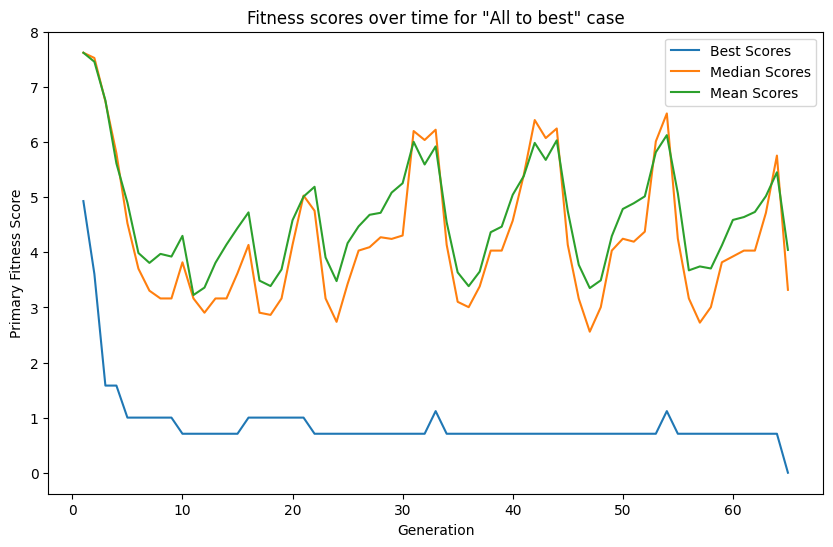

In [12]:
x_values = range(1, len(best_scores)+1)

plt.figure(figsize=(10, 6))

plt.plot(x_values, best_scores, label="Best Scores")
plt.plot(x_values, median_scores, label="Median Scores")
plt.plot(x_values, mean_scores, label="Mean Scores")

plt.title("Fitness scores over time for \"All to best\" case")
plt.xlabel("Generation")
plt.ylabel("Primary Fitness Score")
plt.legend()

plt.show()

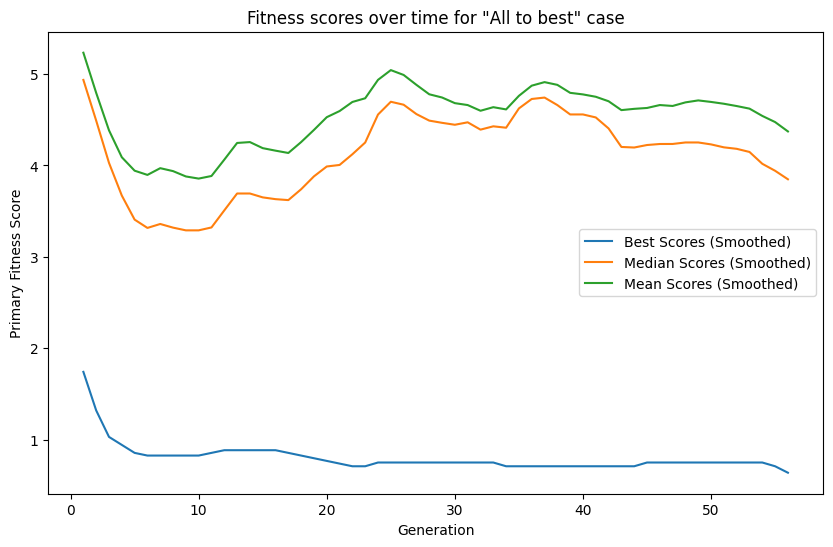

In [13]:
best_scores_smooth = fn.moving_average(best_scores, WINDOW_SIZE)
median_scores_smooth = fn.moving_average(median_scores, WINDOW_SIZE)
mean_scores_smooth = fn.moving_average(mean_scores, WINDOW_SIZE)

x_values_smooth = range(1, len(best_scores_smooth) + 1)

plt.figure(figsize=(10, 6))

plt.plot(x_values_smooth, best_scores_smooth, label="Best Scores (Smoothed)")
plt.plot(x_values_smooth, median_scores_smooth, label="Median Scores (Smoothed)")
plt.plot(x_values_smooth, mean_scores_smooth, label="Mean Scores (Smoothed)")

plt.title("Fitness scores over time for \"All to best\" case")
plt.xlabel("Generation")
plt.ylabel("Primary Fitness Score")
plt.legend()

plt.show()

### Grid world path optimization evolution

1. generation 1 grid world


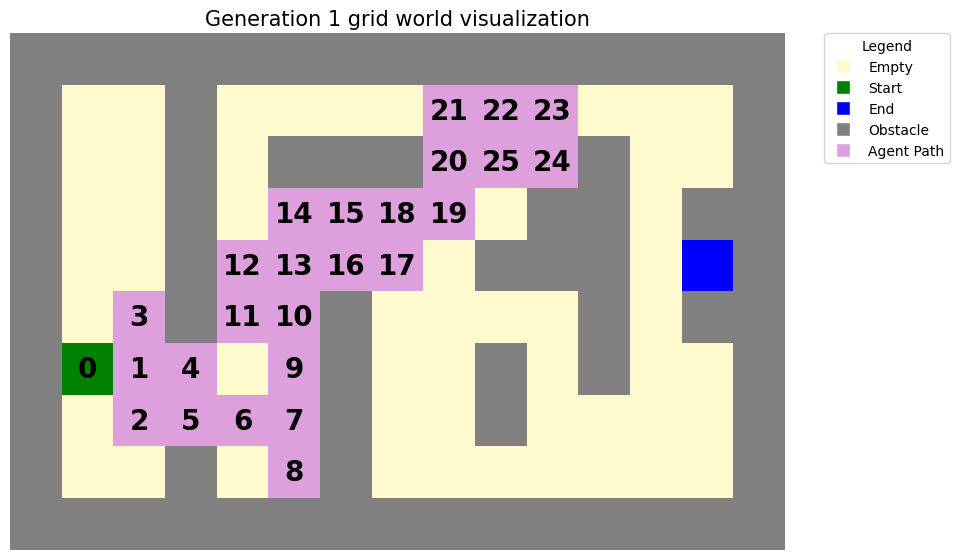

----------------------------------------------------------------------------------------------------

2. generation 6 grid world


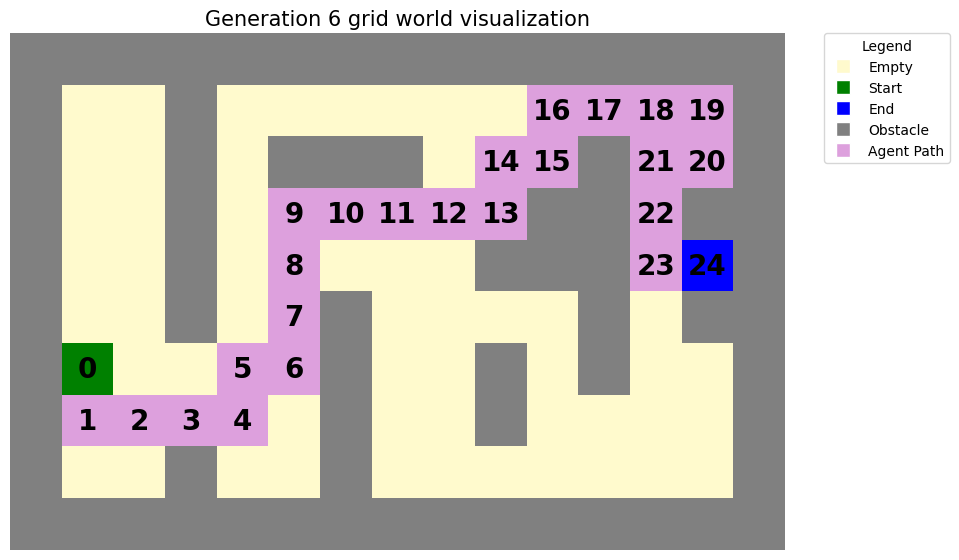

----------------------------------------------------------------------------------------------------

3. generation 12 grid world


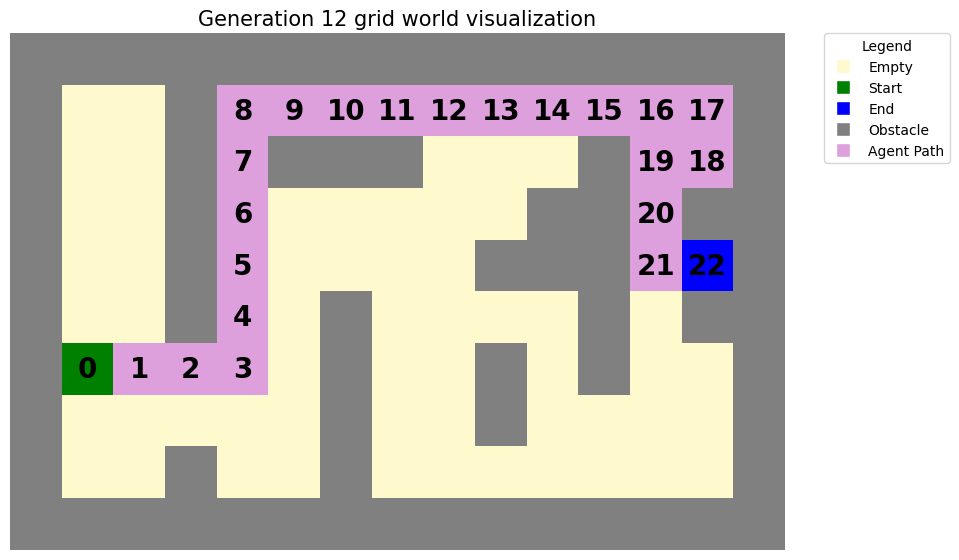

----------------------------------------------------------------------------------------------------

4. generation 18 grid world


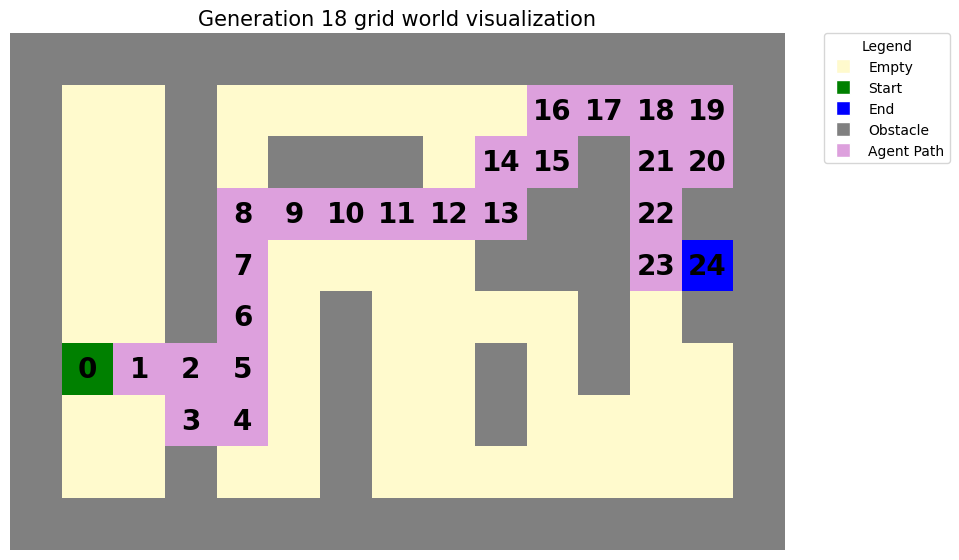

----------------------------------------------------------------------------------------------------

5. generation 24 grid world


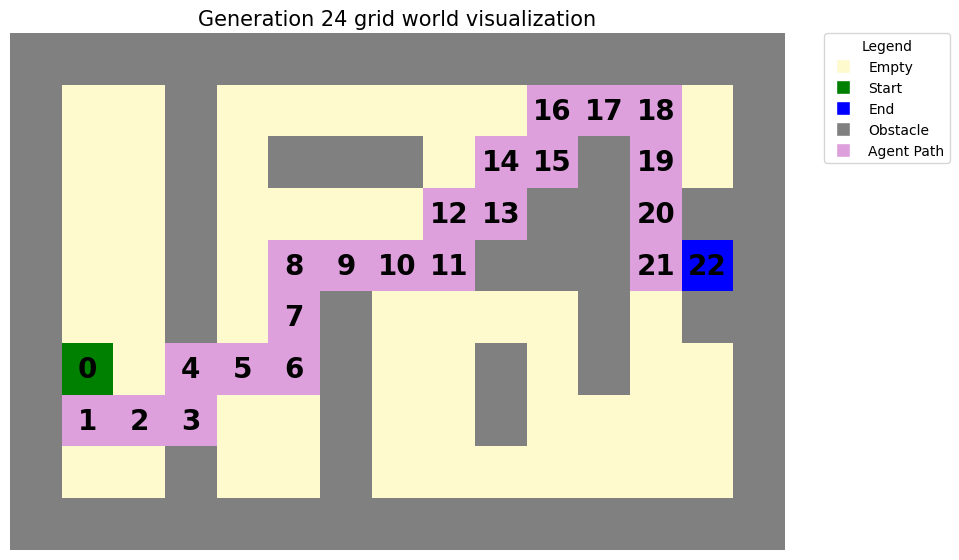

----------------------------------------------------------------------------------------------------

6. generation 30 grid world


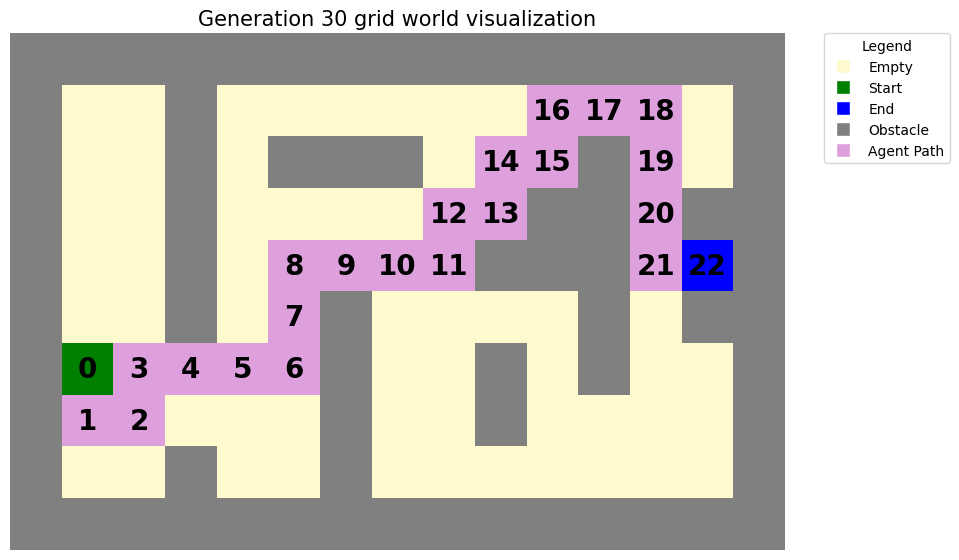

----------------------------------------------------------------------------------------------------

7. generation 36 grid world


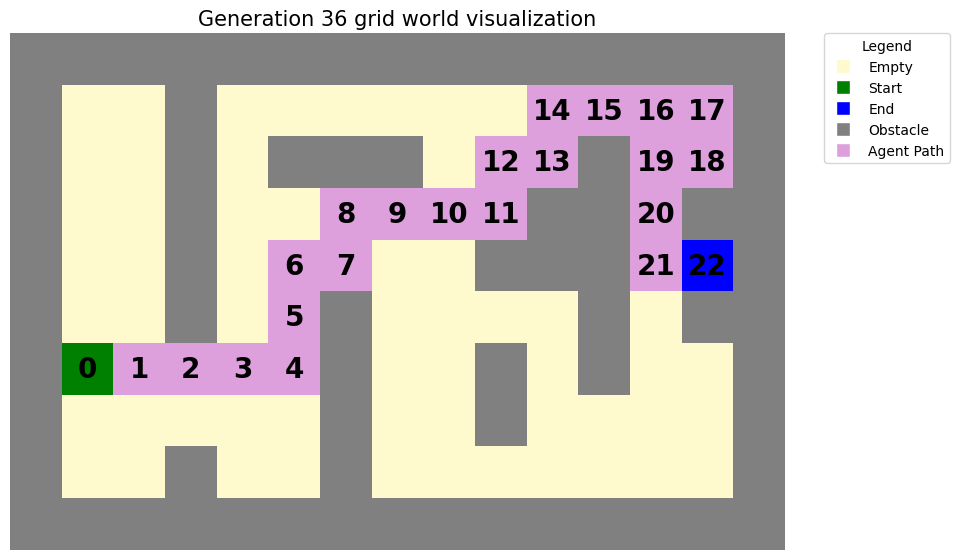

----------------------------------------------------------------------------------------------------

8. generation 42 grid world


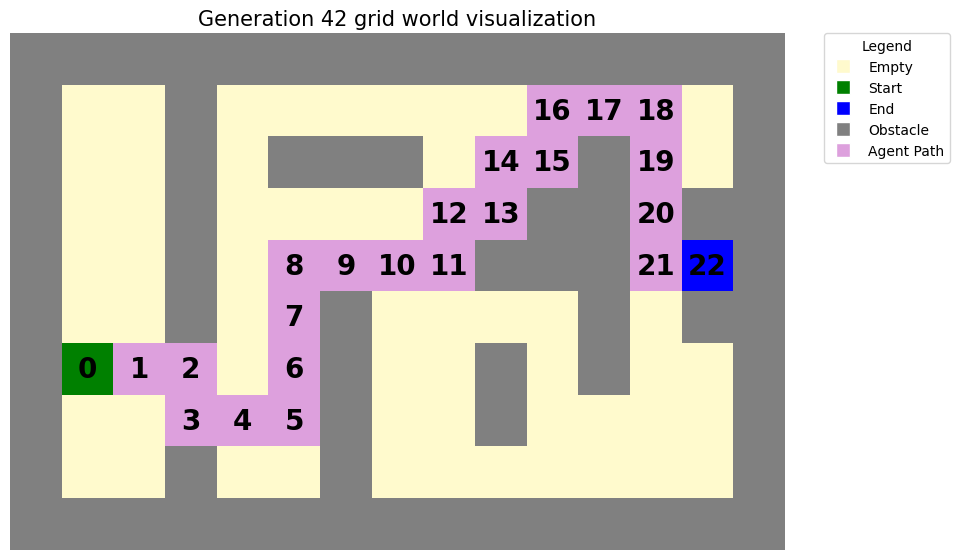

----------------------------------------------------------------------------------------------------

9. generation 48 grid world


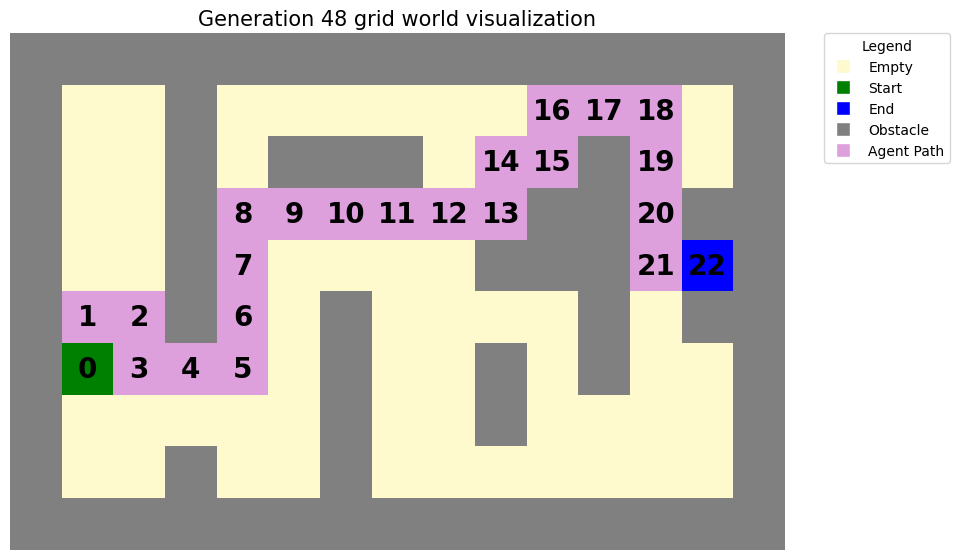

----------------------------------------------------------------------------------------------------

10. generation 54 grid world


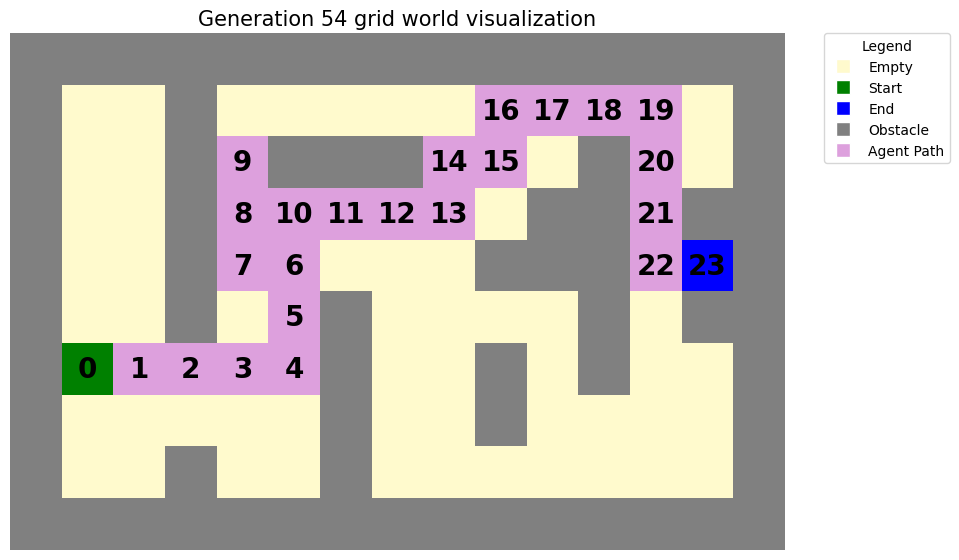

----------------------------------------------------------------------------------------------------

11. generation 60 grid world


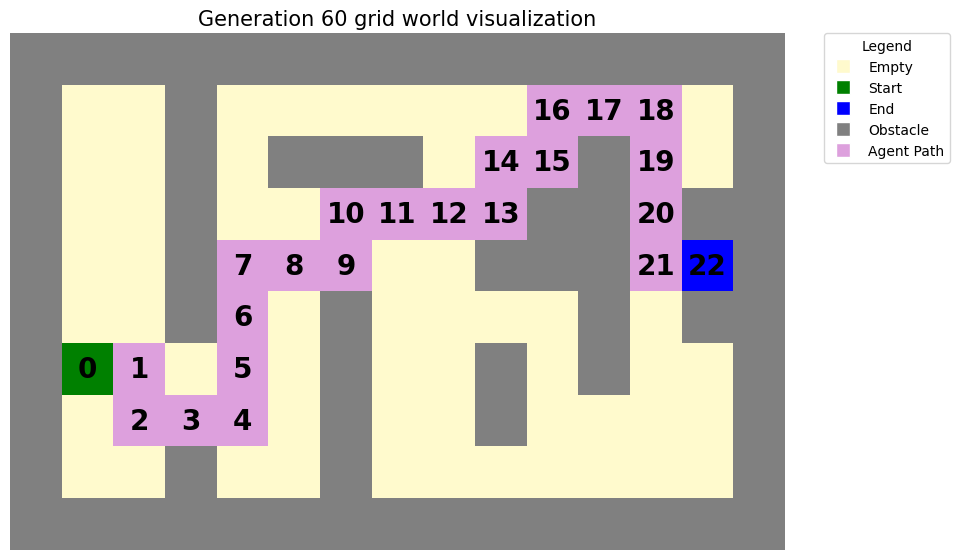

----------------------------------------------------------------------------------------------------

12. generation 65 grid world


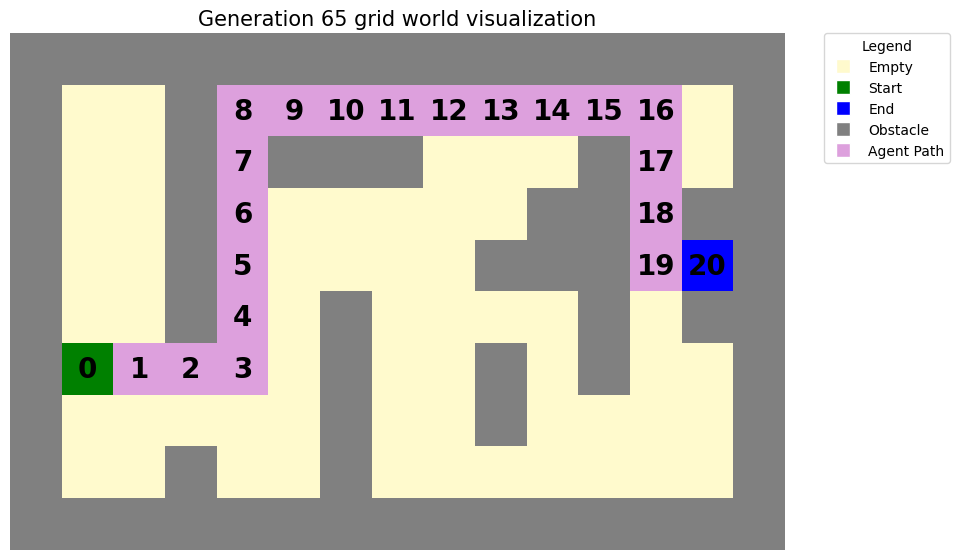

----------------------------------------------------------------------------------------------------



In [14]:
generation_step = generation // 10

counter = 1
for generation, grid_world in enumerate(best_grid_worlds, 1):
    if generation == 1 or generation == best_generation or generation%generation_step == 0:
        print(f"{counter}. generation {generation} grid world")
        title = f"Generation {generation} grid world visualization"
        fn.grid_world_visualization(grid_world, agent_path=best_population_paths[generation-1], title=title, agent_flag=1)
        print(LINE)
        print()
        counter += 1

In [15]:
print(DOUBLE_LINE)
print("PATHS RECONSTRUCTION AND VIDEO CREATION")
print(DOUBLE_LINE)

print("Path reconstruction:")
fn.path_reconstruction(
    best_population_paths=best_population_paths, 
    initial_grid_world=initial_grid_world, 
    results_path=BEST_TO_REST_RESULTS_PATH, 
    start_position=START_POSITION, 
    end_position=END_POSITION, 
    step=generation_step, 
    title_type="generation", 
    path_flag=1
)

print(LINE)

print("Video creation...")
fn.video_creation(BEST_TO_REST_RESULTS_PATH, BEST_TO_REST_VIDEO_PATH)
print("Video creation finished!")

print(DOUBLE_LINE)

PATHS RECONSTRUCTION AND VIDEO CREATION
Path reconstruction:


Processing generations/iterations: 100%|██████████| 12/12 [02:16<00:00, 11.38s/it]


----------------------------------------------------------------------------------------------------
Video creation...


ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7.3.0 (crosstool-NG 1.23.0.449-a04d0)
  configuration: --prefix=/tmp/build/80754af9/ffmpeg_1587154242452/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placeho --cc=/tmp/build/80754af9/ffmpeg_1587154242452/_build_env/bin/x86_64-conda_cos6-linux-gnu-cc --disable-doc --enable-avresample --enable-gmp --enable-hardcoded-tables --enable-libfreetype --enable-libvpx --enable-pthreads --enable-libopus --enable-postproc --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --disable-nonfree --enable-gpl --enable-gnutls --disable-openssl --enable-libopenh264 --enable-libx264
  libavutil      56. 31.100 / 56. 31.100
  libavcodec     58. 54.100 / 58. 54.100
  libavformat    58. 29.100 / 58. 29.100


Video saved to ./results/GA results/non-reentrant fields/best_to_rest_results.mp4
Video creation finished!


frame=  281 fps=116 q=-1.0 Lsize=     417kB time=00:00:55.60 bitrate=  61.4kbits/s speed=  23x    
video:413kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.873457%
[libx264 @ 0x5590c8666180] frame I:2     Avg QP: 8.14  size: 23586
[libx264 @ 0x5590c8666180] frame P:184   Avg QP:16.03  size:  1800
[libx264 @ 0x5590c8666180] frame B:95    Avg QP:14.27  size:   462
[libx264 @ 0x5590c8666180] consecutive B-frames: 38.1% 44.8% 17.1%  0.0%
[libx264 @ 0x5590c8666180] mb I  I16..4: 81.2%  5.2% 13.6%
[libx264 @ 0x5590c8666180] mb P  I16..4:  1.3%  0.5%  0.8%  P16..4:  1.4%  0.2%  0.1%  0.0%  0.0%    skip:95.6%
[libx264 @ 0x5590c8666180] mb B  I16..4:  0.7%  0.2%  0.2%  B16..8:  1.9%  0.1%  0.0%  direct: 0.1%  skip:96.8%  L0:54.2% L1:45.0% BI: 0.8%
[libx264 @ 0x5590c8666180] 8x8 transform intra:16.0% inter:54.2%
[libx264 @ 0x5590c8666180] coded y,uvDC,uvAC intra: 14.5% 37.3% 30.8% inter: 0.4% 0.7% 0.5%
[libx264 @ 0x5590c8666180] i16 v,h,dc,p: 67% 32%  1%  0%
[li

In [16]:
Video(BEST_TO_REST_VIDEO_PATH, embed=True)

## Hybrid evolutionary case

### Simulation

In [17]:
results = sm.ga_simulation(
    num_generations=NUM_GENERATIONS,
    population_size=POPULATION_SIZE,
    chromosome_length=CHROMOSOME_LENGTH,
    initial_mutation_rate=MUTATION_RATE,
    selection_type="hybrid",
    progressive_mutation=PROGRESSIVE_MUTATION,
    bias=BIAS,
    early_stop=EARLY_STOP,
    best_ones_percentage=BEST_ONES_PERCENTAGE,
    worst_ones_percentage=WORST_ONES_PERCENTAGE,
    num_optimal_steps=NUM_OPTIMAL_STEPS,
    start_position=START_POSITION,
    end_position=END_POSITION,
    grid_size=GRID_SIZE,
    initial_grid_world=initial_grid_world,
    random_seed=RANDOM_STATE,
    simulation_started_message=SIMULATION_STARTED,
    simulation_finished_message=SIMULATION_FINISHED,
    revisit_possible = REVISIT_POSSIBLE,
    verbose="Full",
    line = LINE,
    double_line = DOUBLE_LINE   
)

best_generation = results[1]
best_scores = results[7]
median_scores = results[9]
mean_scores = results[10]
best_grid_worlds = results[11]
best_population_paths = results[12]
generation = results[13]

------------------------------------ !!! SIMULATION STARTED !!! ------------------------------------
 1. generation finished - best score: 4.9286 - median score: 7.6205 - mean score: 7.6211 - steps: 25
----------------------------------------------------------------------------------------------------
 10. generation finished - best score: 3.1623 - median score: 6.7609 - mean score: 6.7429 - steps: 20
----------------------------------------------------------------------------------------------------
 20. generation finished - best score: 3.1623 - median score: 6.7082 - mean score: 6.636 - steps: 20
----------------------------------------------------------------------------------------------------
 30. generation finished - best score: 1.8028 - median score: 6.6444 - mean score: 6.4079 - steps: 25
----------------------------------------------------------------------------------------------------
 40. generation finished - best score: 1.8028 - median score: 6.5811 - mean score: 6.2801

### Result scores visualization

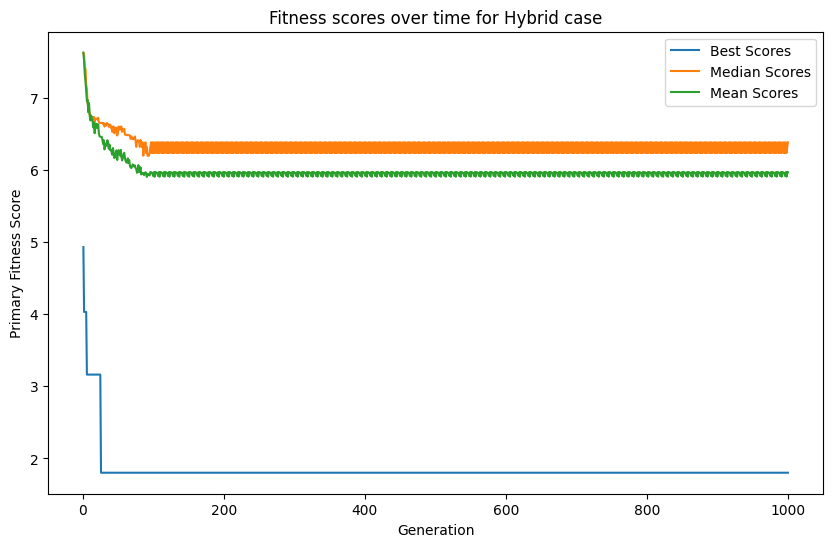

In [18]:
x_values = range(1, len(best_scores)+1)

plt.figure(figsize=(10, 6))

plt.plot(x_values, best_scores, label="Best Scores")
plt.plot(x_values, median_scores, label="Median Scores")
plt.plot(x_values, mean_scores, label="Mean Scores")

plt.title("Fitness scores over time for Hybrid case")
plt.xlabel("Generation")
plt.ylabel("Primary Fitness Score")
plt.legend()

plt.show()

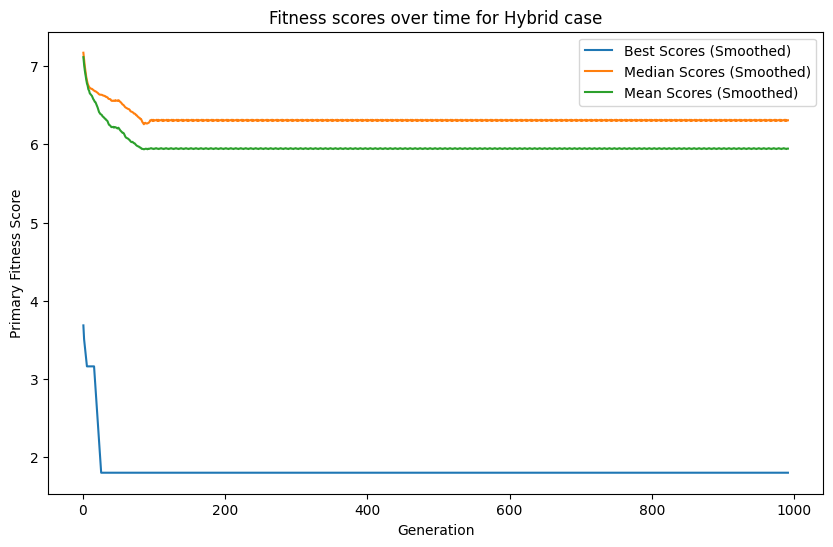

In [19]:
best_scores_smooth = fn.moving_average(best_scores, WINDOW_SIZE)
median_scores_smooth = fn.moving_average(median_scores, WINDOW_SIZE)
mean_scores_smooth = fn.moving_average(mean_scores, WINDOW_SIZE)

x_values_smooth = range(1, len(best_scores_smooth) + 1)

plt.figure(figsize=(10, 6))

plt.plot(x_values_smooth, best_scores_smooth, label="Best Scores (Smoothed)")
plt.plot(x_values_smooth, median_scores_smooth, label="Median Scores (Smoothed)")
plt.plot(x_values_smooth, mean_scores_smooth, label="Mean Scores (Smoothed)")

plt.title("Fitness scores over time for Hybrid case")
plt.xlabel("Generation")
plt.ylabel("Primary Fitness Score")
plt.legend()

plt.show()

### Grid world path optimization evolution

1. generation 1 grid world


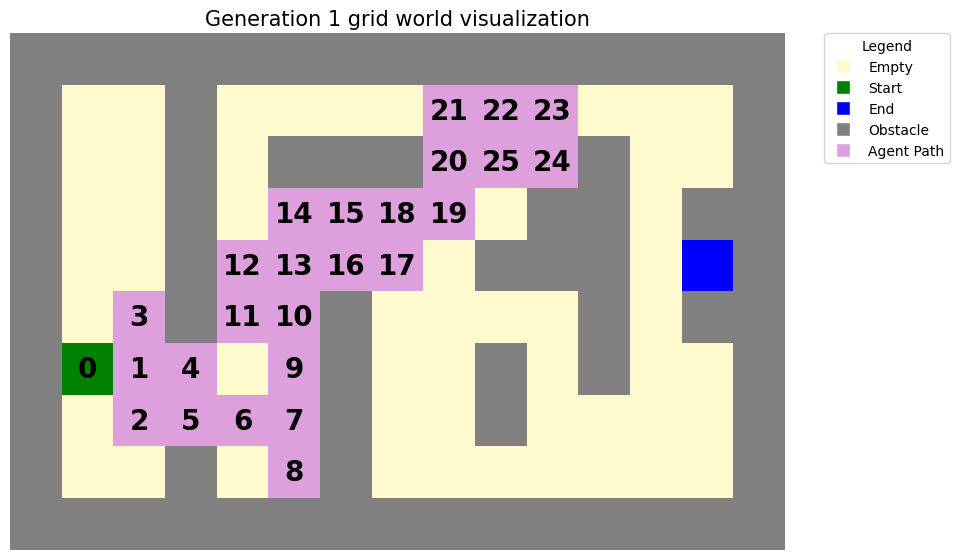

----------------------------------------------------------------------------------------------------

2. generation 26 grid world


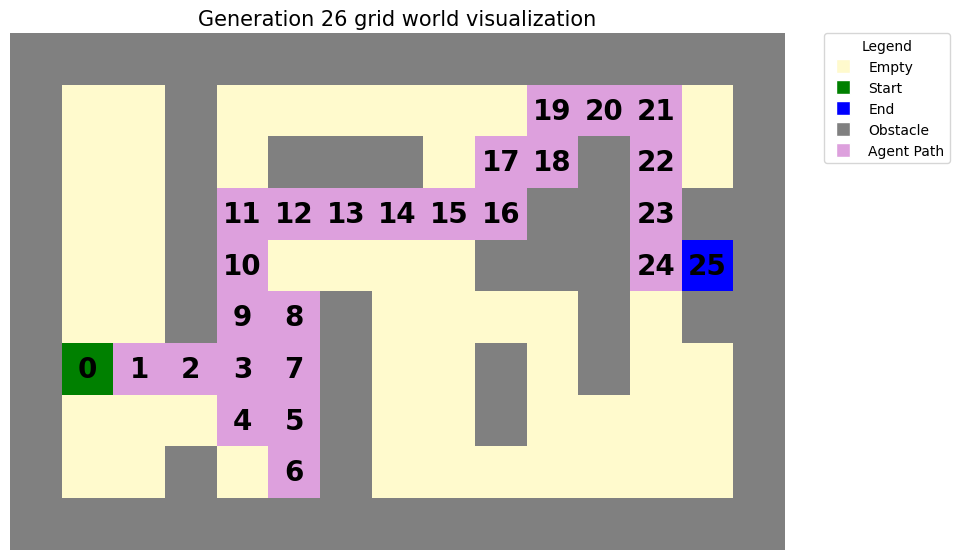

----------------------------------------------------------------------------------------------------

3. generation 100 grid world


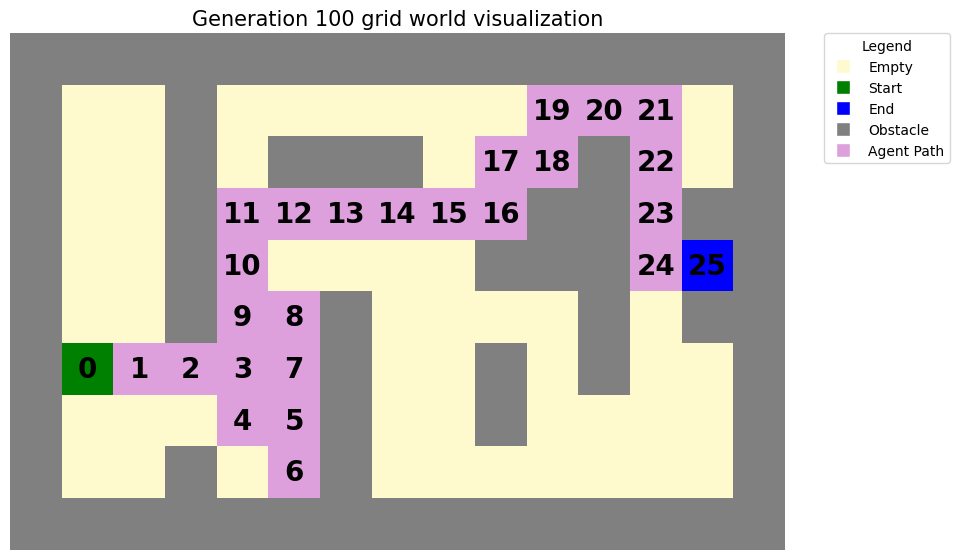

----------------------------------------------------------------------------------------------------

4. generation 200 grid world


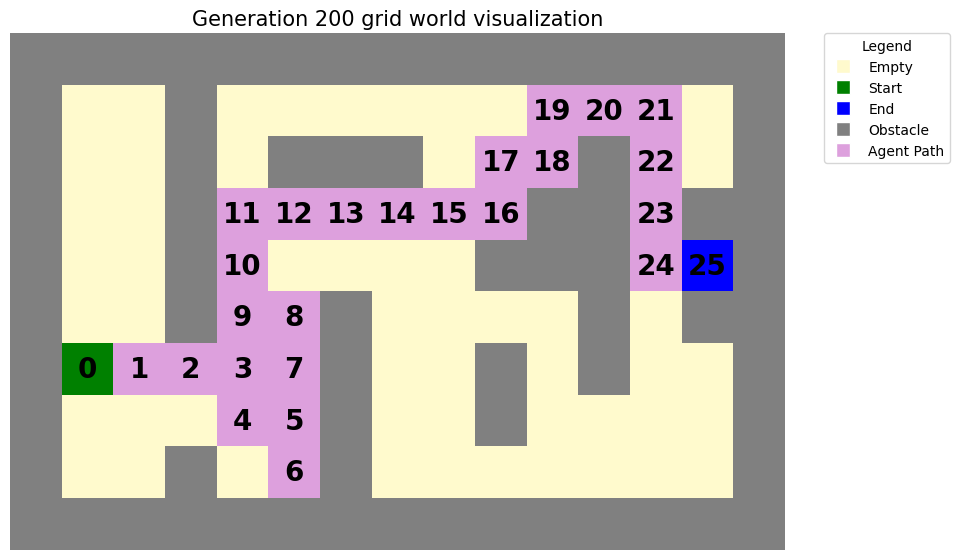

----------------------------------------------------------------------------------------------------

5. generation 300 grid world


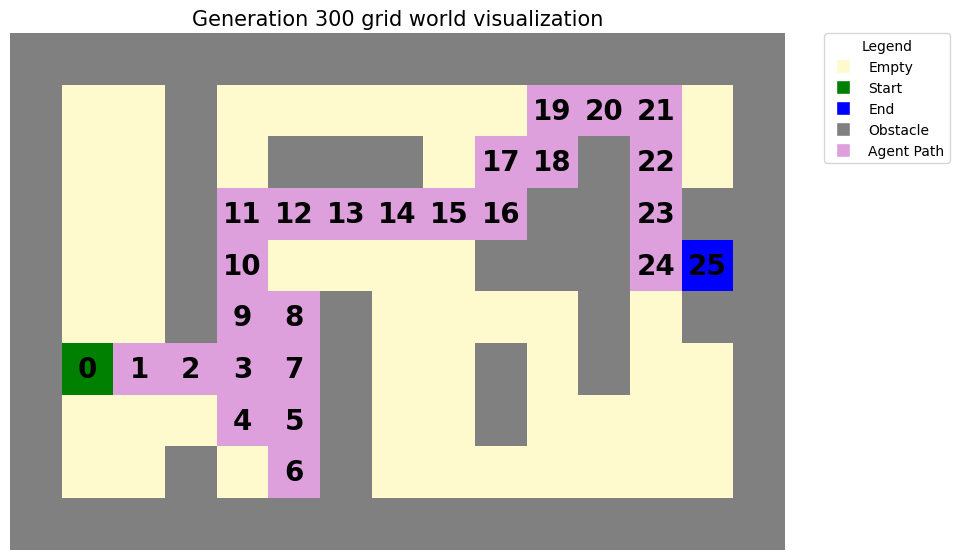

----------------------------------------------------------------------------------------------------

6. generation 400 grid world


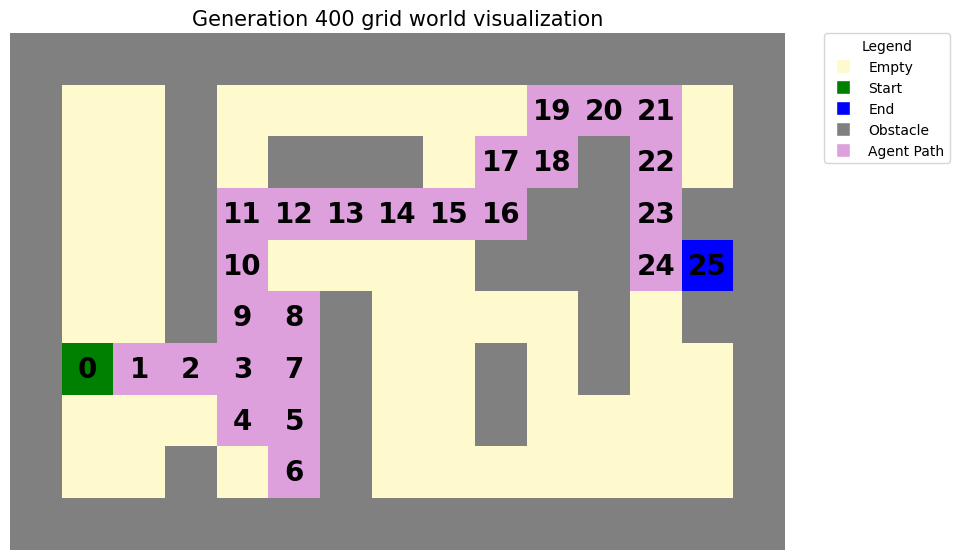

----------------------------------------------------------------------------------------------------

7. generation 500 grid world


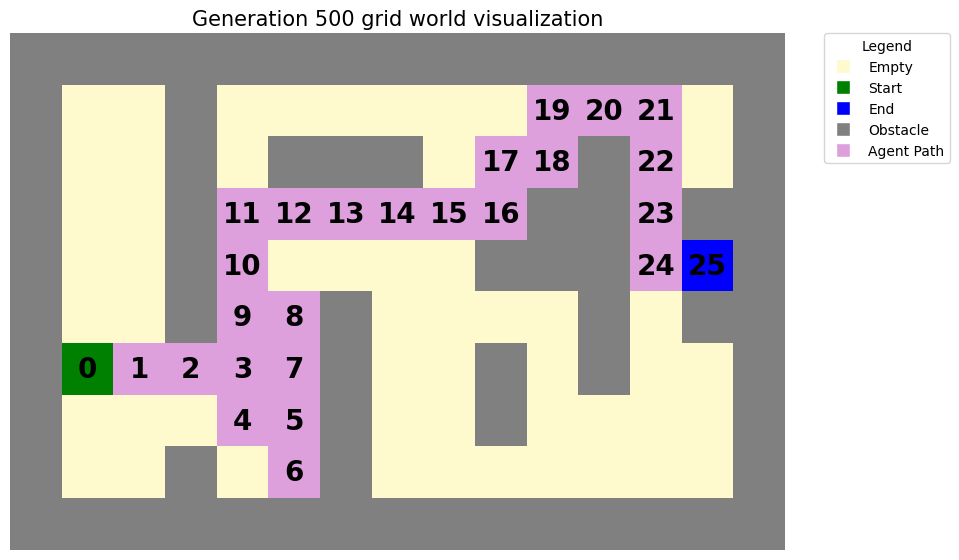

----------------------------------------------------------------------------------------------------

8. generation 600 grid world


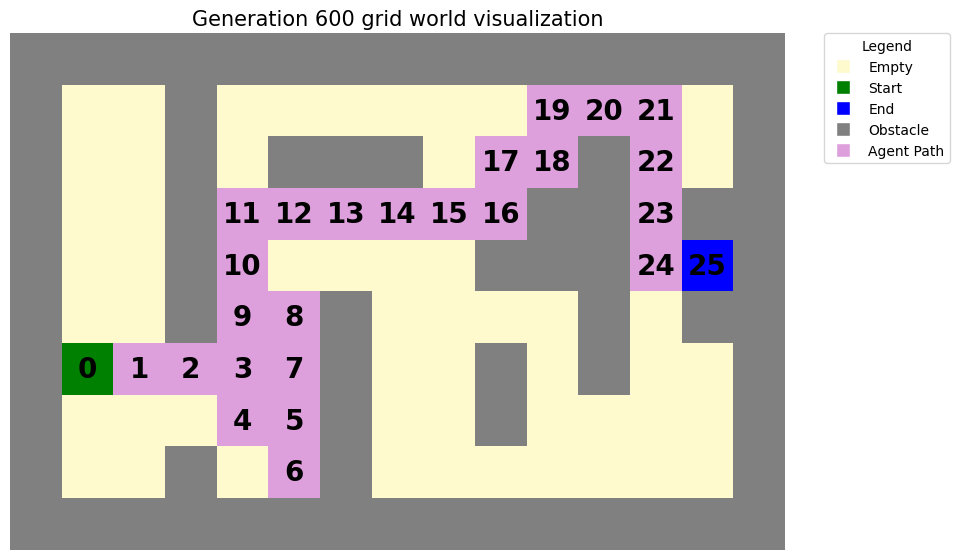

----------------------------------------------------------------------------------------------------

9. generation 700 grid world


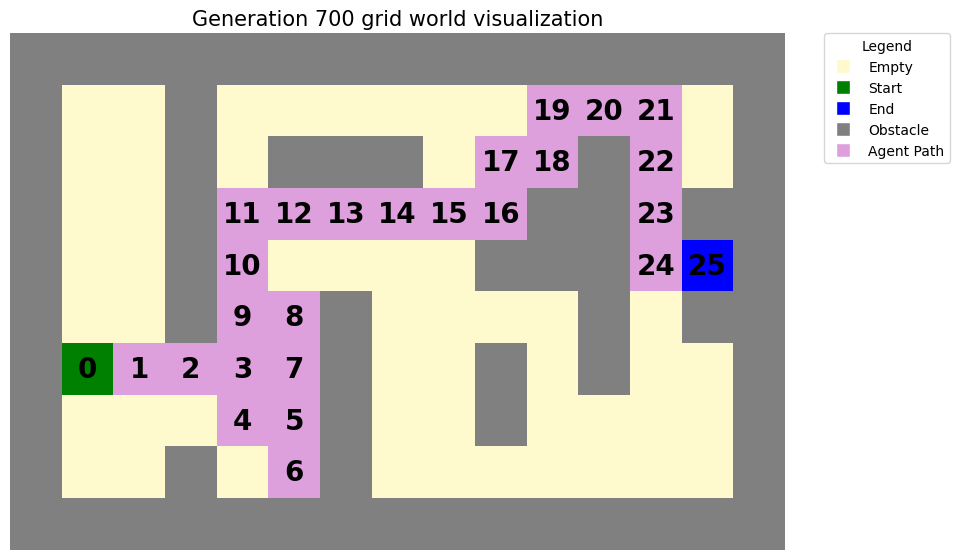

----------------------------------------------------------------------------------------------------

10. generation 800 grid world


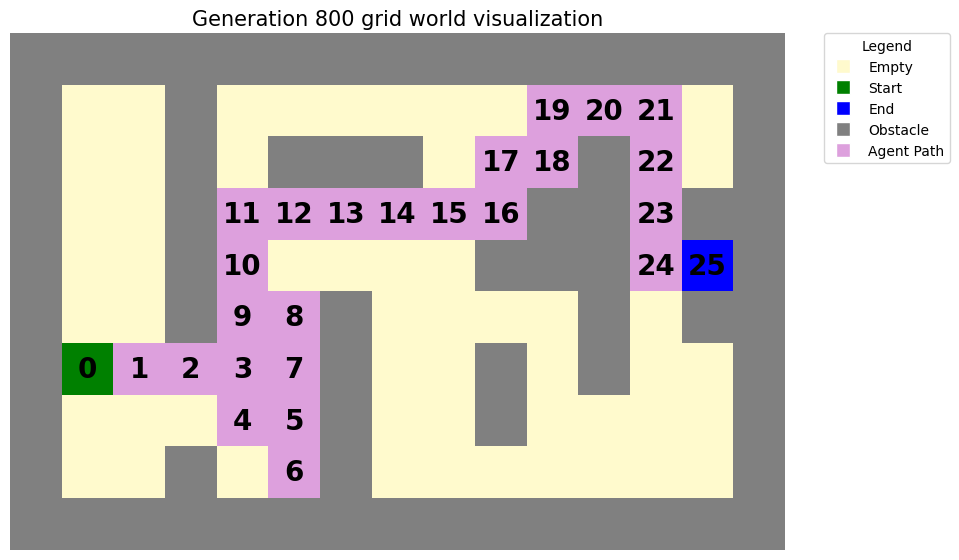

----------------------------------------------------------------------------------------------------

11. generation 900 grid world


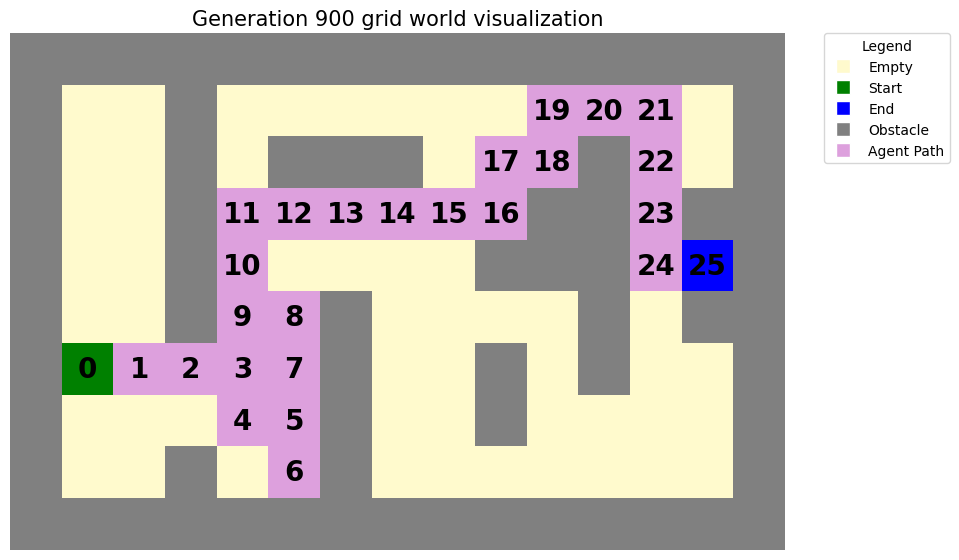

----------------------------------------------------------------------------------------------------

12. generation 1000 grid world


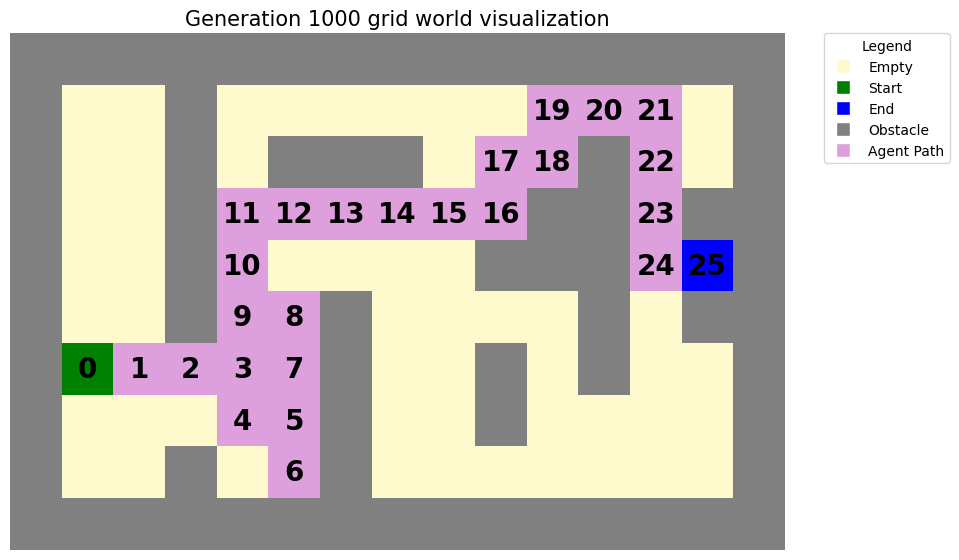

----------------------------------------------------------------------------------------------------



In [20]:
generation_step = generation // 10

counter = 1
for generation, grid_world in enumerate(best_grid_worlds, 1):
    if generation == 1 or generation == best_generation or generation%generation_step == 0:
        print(f"{counter}. generation {generation} grid world")
        title = f"Generation {generation} grid world visualization"
        fn.grid_world_visualization(grid_world, agent_path=best_population_paths[generation-1], title=title, agent_flag=1)
        print(LINE)
        print()
        counter += 1

In [21]:
print(DOUBLE_LINE)
print("PATHS RECONSTRUCTION AND VIDEO CREATION")
print(DOUBLE_LINE)

print("Path reconstruction:")
fn.path_reconstruction(
    best_population_paths=best_population_paths, 
    initial_grid_world=initial_grid_world, 
    results_path=HYBRID_RESULTS_PATH, 
    start_position=START_POSITION, 
    end_position=END_POSITION, 
    step=generation_step, 
    title_type="generation", 
    path_flag=1
)

print(LINE)

print("Video creation...")
fn.video_creation(HYBRID_RESULTS_PATH, HYBRID_VIDEO_PATH)
print("Video creation finished!")

print(DOUBLE_LINE)

PATHS RECONSTRUCTION AND VIDEO CREATION
Path reconstruction:


Processing generations/iterations: 100%|██████████| 11/11 [02:31<00:00, 13.78s/it]


----------------------------------------------------------------------------------------------------
Video creation...


ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7.3.0 (crosstool-NG 1.23.0.449-a04d0)
  configuration: --prefix=/tmp/build/80754af9/ffmpeg_1587154242452/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placeho --cc=/tmp/build/80754af9/ffmpeg_1587154242452/_build_env/bin/x86_64-conda_cos6-linux-gnu-cc --disable-doc --enable-avresample --enable-gmp --enable-hardcoded-tables --enable-libfreetype --enable-libvpx --enable-pthreads --enable-libopus --enable-postproc --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --disable-nonfree --enable-gpl --enable-gnutls --disable-openssl --enable-libopenh264 --enable-libx264
  libavutil      56. 31.100 / 56. 31.100
  libavcodec     58. 54.100 / 58. 54.100
  libavformat    58. 29.100 / 58. 29.100


Video saved to ./results/GA results/non-reentrant fields/hybrid_results.mp4
Video creation finished!


frame=  286 fps=171 q=-1.0 Lsize=     442kB time=00:00:56.60 bitrate=  64.0kbits/s speed=33.8x    
video:439kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: 0.815863%
[libx264 @ 0x556a5371d180] frame I:2     Avg QP: 8.09  size: 24827
[libx264 @ 0x556a5371d180] frame P:206   Avg QP:15.57  size:  1760
[libx264 @ 0x556a5371d180] frame B:78    Avg QP:12.19  size:   467
[libx264 @ 0x556a5371d180] consecutive B-frames: 46.2% 51.7%  2.1%  0.0%
[libx264 @ 0x556a5371d180] mb I  I16..4: 81.9%  4.0% 14.1%
[libx264 @ 0x556a5371d180] mb P  I16..4:  1.2%  0.3%  0.7%  P16..4:  1.3%  0.2%  0.1%  0.0%  0.0%    skip:96.2%
[libx264 @ 0x556a5371d180] mb B  I16..4:  0.9%  0.2%  0.2%  B16..8:  1.7%  0.2%  0.1%  direct: 0.0%  skip:96.7%  L0:62.1% L1:36.8% BI: 1.1%
[libx264 @ 0x556a5371d180] 8x8 transform intra:10.7% inter:57.5%
[libx264 @ 0x556a5371d180] coded y,uvDC,uvAC intra: 14.4% 36.9% 29.9% inter: 0.5% 0.7% 0.6%
[libx264 @ 0x556a5371d180] i16 v,h,dc,p: 65% 33%  3%  0%
[li

In [22]:
Video(HYBRID_VIDEO_PATH, embed=True)